In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [2]:
path = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(path)
df


,Unnamed: 0,specObjID,ra,dec,z,zErr,Types,d4000_n,sigmaStars,fracDeV_r,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
0,0,2795715636188178432,162.87876,16.838215,0.022297,0.000007,elliptical,1.939160,128.97870,1.000000,17.35997,15.50984,14.68634,14.30167,14.01772
1,1,2840803871343798272,240.39499,11.850668,0.053161,0.000011,elliptical,1.944695,183.85820,0.935781,19.15590,17.14306,16.24167,15.81783,15.50098
2,2,2800218136303921152,164.66952,16.900165,0.068568,0.000009,spiral,1.282932,81.20707,0.420175,18.36842,17.18698,16.64672,16.31816,16.09746
3,3,2800232155077175296,164.85617,16.979098,0.083634,0.000019,spiral,1.565293,97.63731,0.170645,18.47494,17.25055,16.64057,16.32310,16.13419
4,4,2849703318459017216,245.52298,10.278617,0.128543,0.000025,spiral,1.453489,219.17930,0.478295,19.32188,17.80865,17.02585,16.56203,16.39108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525335,583519,2795713986920736768,162.43700,17.284938,0.056785,0.000006,spiral,1.123235,98.59753,0.000000,19.50647,17.86611,17.53326,17.20054,17.99106
525336,583520,2916209471627749376,155.78431,15.811398,0.145377,0.000023,elliptical,1.496544,148.20890,1.000000,20.09706,18.75447,17.76428,17.33186,17.03715
525337,583522,2920722966893324288,159.56049,16.508320,0.178770,0.000020,spiral,1.549078,91.99490,0.407970,19.59916,18.35870,17.55004,17.16154,17.01065
525338,583523,2792375044968310784,161.67263,16.703673,0.056509,0.000008,spiral,1.398121,83.41415,0.282227,19.66740,18.04996,17.17682,16.70945,16.39195


In [54]:
rs = df.loc[:, 'z']
Types = df.loc[0:1000, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '1').replace('spiral', '0')).astype(int)
fd = df.loc[:, 'fracDeV_r']

X = np.array(df.loc[0:1000, 'petroMag_u':'petroMag_z'])
# u, g, r, i, z band 0, 1, 2, 3, 4
ug = X[:, [0, 1]]
ur = X[:, [0, 2]]
ui = X[:, [0, 3]]
uz = X[:, [0, 4]]
gr = X[:, [1, 2]]
gi = X[:, [1, 3]]
gz = X[:, [1, 4]]
ri = X[:, [2, 3]]
rz = X[:, [2, 4]]
iz = X[:, [3, 4]]
y = np.array(types)


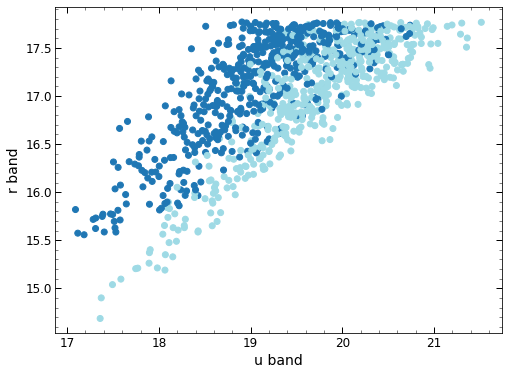

In [55]:
plt.figure(figsize=(8, 6), facecolor='none')  # size กราฟ & สีข้างนอก
# xlim = [16.5, 22.5]  # ขอบเขตของแกน
# xticks = np.linspace(17, 22, 6)  # ขอบเขตของแกนที่โชว์
# ylim = [14.5, 18]
# yticks = np.linspace(14.5, 18, 8)
# plt.gca(xlim=xlim, xticks=xticks, ylim=ylim, yticks=yticks)

# scatter=กราฟกระจาย , c=การเปลี่ยนสีของจุด , alpha=ความจางของจุด , s=ขนาดของจุด
plt.scatter(ur[:, 0], ur[:, 1], c=y, cmap='tab20')

plt.xlabel('u band', fontsize='14')
plt.ylabel('r band', fontsize='14')
plt.minorticks_on()
plt.tick_params(which='both', labelsize='12',
                direction='in', top='1', right='1')
plt.tick_params(which='major',  length=6, width=1)
plt.tick_params(which='minor',  length=3, width=0.5)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(ur, y, random_state=42)

# Model 1: Linear SVC version
# Create a pipeline
clf_linSVC = Pipeline([
    ("linear_svc", LinearSVC(C=10000, loss="hinge", max_iter=1000000000))
])

# Train the model
clf_linSVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_linSVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_linSVC.score(X_test, y_test)))

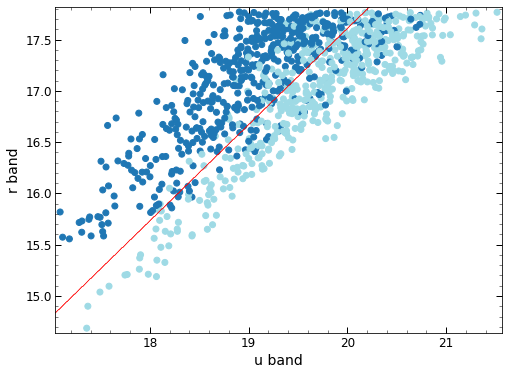

In [60]:
# Plot the decision boundaries
def plot_decision_boundary(clf, ur, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = ur[:, 0].min() - 10*h, ur[:, 0].max() + 10*h
    y_min, y_max = ur[:, 1].min() - 10*h, ur[:, 1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.scatter(ur[:, 0], ur[:, 1], c=y, cmap='tab20')  # Data points

    # plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='r', linewidths=0.2)  # Boundary lines

    plt.xlabel('u band', fontsize='14')
    plt.ylabel('r band', fontsize='14')
    plt.minorticks_on()
    plt.tick_params(which='both', labelsize='12',
                    direction='in', top='1', right='1')
    plt.tick_params(which='major',  length=6, width=1)
    plt.tick_params(which='minor',  length=3, width=0.5)


plot_decision_boundary(clf_linSVC, ur, y)
